In [17]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [19]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [8]:
binary_1mil = load_data('COMPAS_Output_1mil_copy.h5', 'BSE')
binary_merger_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 15, 15) #merger products only
merger_progenitor_1mil = restrict(restrict(binary_1mil, 'type1', 0, 1), 'type2', 0, 1) 

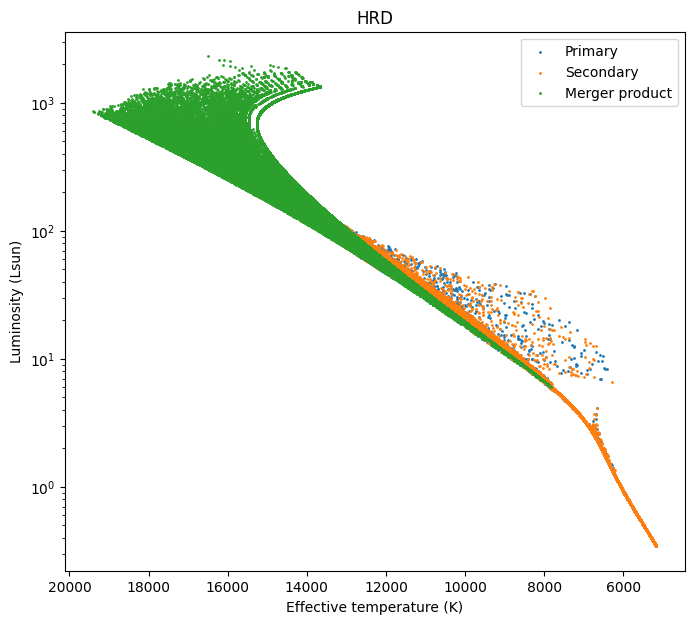

In [11]:
plt.figure(figsize=(8,7))
plt.scatter(merger_progenitor_1mil.Teff1, merger_progenitor_1mil.L1, label = 'Primary', s = 1)
plt.scatter(merger_progenitor_1mil.Teff2, merger_progenitor_1mil.L2, label = 'Secondary', s = 1)
plt.scatter(binary_merger_1mil.Teff1, binary_merger_1mil.L1, label = 'Merger product', s = 1)
plt.gca().invert_xaxis()
plt.title('HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [21]:
filename = 'COMPAS_Output_M0.8to6_80Myr.h5'

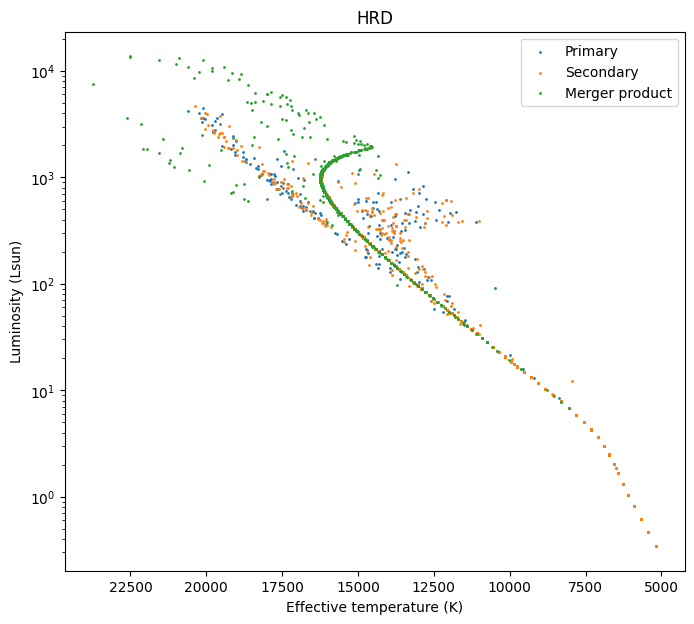

In [22]:
binary = load_data(filename, 'BSE')
binary_merger = restrict(restrict(binary, 'type1', 0, 1), 'type2', 15, 15) #merger products only
merger_progenitor = restrict(restrict(binary, 'type1', 0, 1), 'type2', 0, 1) 

plt.figure(figsize=(8,7))
plt.scatter(merger_progenitor.Teff1, merger_progenitor.L1, label = 'Primary', s = 1)
plt.scatter(merger_progenitor.Teff2, merger_progenitor.L2, label = 'Secondary', s = 1)
plt.scatter(binary_merger.Teff1, binary_merger.L1, label = 'Merger product', s = 1)
plt.gca().invert_xaxis()
plt.title('HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

In [23]:
#data = h5.File('COMPAS_Output.h5')
data = h5.File(filename)
SP = data['BSE_System_Parameters']

In [30]:
list(SP.keys())

['ID',
 'Luminosity(1)',
 'Luminosity(2)',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'Merger',
 'PO_Add_Options_To_SysParms',
 'PO_Allow_Immediate_RLOF>CE_To_Survive_CE',
 'PO_Allow_MS_To_Survive_CE',
 'PO_Allow_Non_Stripped_ECSN',
 'PO_Allow_RLOF@Birth',
 'PO_Allow_Radiative_Envelope_To_Survive_CE',
 'PO_Allow_Touching@Birth',
 'PO_BB_Mass_xFer_Stblty_Prscrptn',
 'PO_BH_Kicks',
 'PO_CE_Alpha',
 'PO_CE_Alpha_Thermal',
 'PO_CE_Formalism',
 'PO_CE_Lambda',
 'PO_CE_Lambda_Multiplier',
 'PO_CE_Lambda_Prscrptn',
 'PO_CE_Mass_Accr_Constant',
 'PO_CE_Mass_Accr_Max',
 'PO_CE_Mass_Accr_Min',
 'PO_CE_Mass_Accr_Prscrptn',
 'PO_CE_Recomb_Enrgy_Dnsty',
 'PO_CE_Slope_Kruckow',
 'PO_CHE_Mode',
 'PO_Check_Photon_Tiring_Limit',
 'PO_Circularise@MT',
 'PO_Conserve_AngMom@Circ',
 'PO_Cool_WindMassLoss_Multipl',
 'PO_Eccentricity_Dstrbtn',
 'PO_Eccentricity_Dstrbtn_Max',
 'PO_Eccentricity_Dstrbtn_Min',
 'PO_Eddington_Accr_Factor',
 'PO_Envelope_State_Prscrptn',
 'PO_Evolution_Mode',
 'PO_Fryer22_crit_COcore_Mass

print(SP['SemiMajorAxis@ZAMS'].attrs['units'])

In [24]:
SP_df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()],
            'Init_SemiMajorAxis': SP['SemiMajorAxis@ZAMS'][()],
            'Merger': SP['Merger'][()],
            'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
            'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
        })

In [25]:
merger_SP_df = restrict(SP_df, 'Merger', 1, 1)
#merger_SP_df = restrict(restrict(SP_df, 'type1', 0, 1), 'type2', 15, 15)

In [34]:
print('Merger fraction: ', merger_SP_df.shape[0]/SP_df.shape[0])

Merger fraction:  0.3544


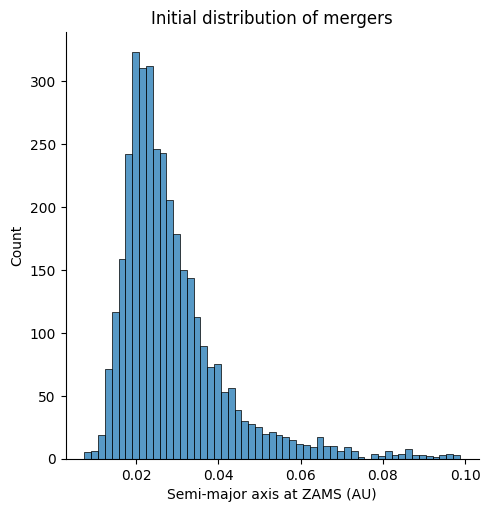

In [27]:
ax = sns.displot(merger_SP_df, x="Init_SemiMajorAxis") #kind="kde")
ax.set(xlabel='Semi-major axis at ZAMS (AU)', ylabel='Count', title='Initial distribution of mergers')

/tmp/ipykernel_16436/3190256211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merger_SP_df.loc[:, "q"] = merger_SP_df.Mass_ZAMS2 / merger_SP_df.Mass_ZAMS1


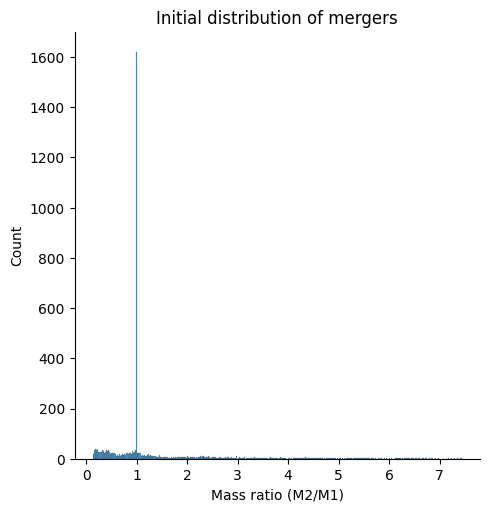

In [28]:
merger_SP_df.loc[:, "q"] = merger_SP_df.Mass_ZAMS2 / merger_SP_df.Mass_ZAMS1
ax = sns.displot(merger_SP_df, x="q") #kind="kde")
ax.set(xlabel='Mass ratio (M2/M1)', ylabel='Count', title='Initial distribution of mergers')

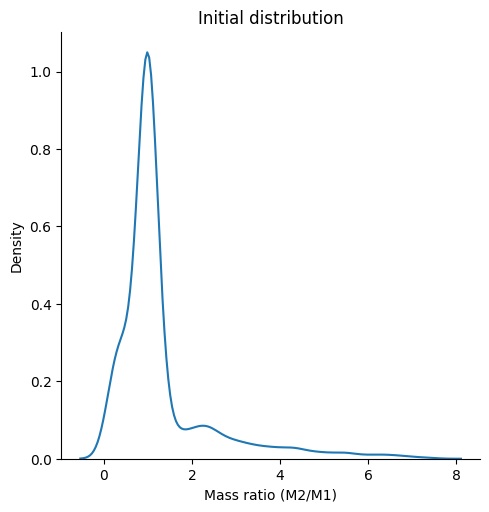

In [35]:
ax = sns.displot(merger_SP_df, x="q", kind="kde")
ax.set(xlabel='Mass ratio (M2/M1)', title='Initial distribution')

Merger fraction:  0.4189


/tmp/ipykernel_16436/240023175.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merger_SP_df.loc[:, "q"] = merger_SP_df.Mass_ZAMS2 / merger_SP_df.Mass_ZAMS1


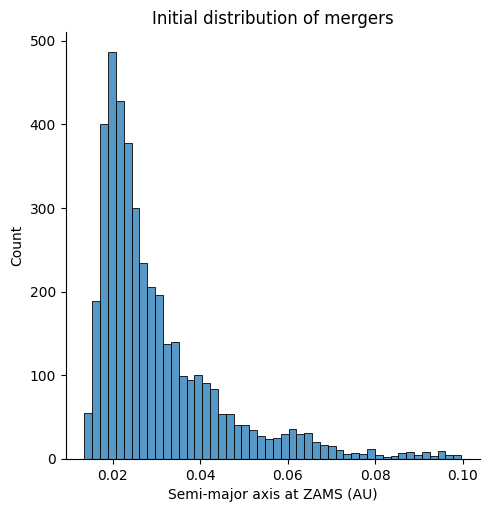

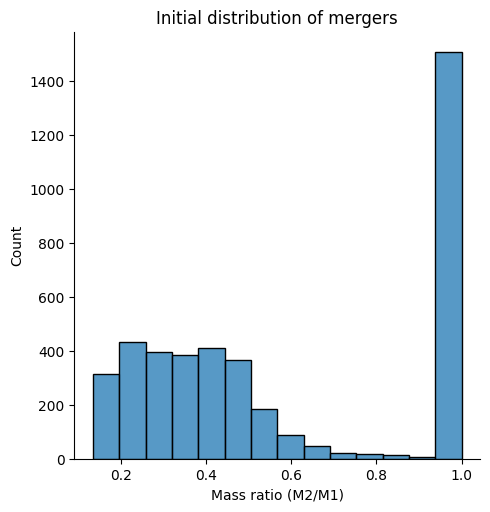

In [38]:
filename = 'COMPAS_Output_M0.8to3to6_80Myr.h5'
data = h5.File(filename)
SP = data['BSE_System_Parameters']
SP_df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()],
            'Init_SemiMajorAxis': SP['SemiMajorAxis@ZAMS'][()],
            'Merger': SP['Merger'][()],
            'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
            'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
        })
merger_SP_df = restrict(SP_df, 'Merger', 1, 1)
print('Merger fraction: ', merger_SP_df.shape[0]/SP_df.shape[0])


ax = sns.displot(merger_SP_df, x="Init_SemiMajorAxis") #kind="kde")
ax.set(xlabel='Semi-major axis at ZAMS (AU)', ylabel='Count', title='Initial distribution of mergers')

merger_SP_df.loc[:, "q"] = merger_SP_df.Mass_ZAMS2 / merger_SP_df.Mass_ZAMS1
ax = sns.displot(merger_SP_df, x="q") #kind="kde")
ax.set(xlabel='Mass ratio (M2/M1)', ylabel='Count', title='Initial distribution of mergers')